# Project 4: Data Wrangling

### Overview:

The objective of this project is to gather, assess and clean a dataset that involves the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

### Table of contents:
<ul>
<li><a href="#gather">Gathering the data</a></li>
<li><a href="#assess">Assessing the data</a></li>
<li><a href="#clean">Cleaning the data</a></li>
    <a href="#miss">>Missing data</a>
    <a href="#tidy">>Data Tidiness Issues</a>
    <a href="#dirty">>Data Quality Issues</a>
<li><a href="#store">Storing the data</a></li>
<li><a href="#analysis">Analyzing and visualizing the data</a></li>   
</ul>

<a id='gather'></a>
## Gathering the data

In [284]:
# Import necessary packages for this section
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re as re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Tweet archive file

In [285]:
# Load csv file with tweet archive
archive = pd.read_csv("twitter-archive-enhanced.csv")

### Image Predictions file

In [286]:
# Download tweet image predictions tsv file from Udacity's servers
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
result = requests.get(url)

with open("image_predictions.tsv", mode = 'wb') as f:
    f.write(result.content)

In [287]:
# Load tsv file with image predictions
predictions = pd.read_csv("image_predictions.tsv", sep="\t")

### Tweet's likes and retweets dataset

In [288]:
# Access Twitter's API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [289]:

archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [290]:
# Create a list with tweet's ID's from the archive file
twid = archive["tweet_id"].values

In [291]:
# Query Twitter API to get information for each tweet ID, and save each tweet info as a new line in a txt file 
#("tweet_json.text").
#count = 0
#fails_dict = {}
#start = timer()
#with open('tweet_json.txt', 'w') as outfile:
    #for i in twid:
        #count += 1
        #print(str(count) + ": " + str(i))
        #try:
            #tweet = api.get_status(i, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[i] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

>This code yielded numerous 'Fail' instances, so I commented the code and, following the advice in the forum
(https://knowledge.udacity.com/questions/228949), I downloaded the txt file provided in the instructions 
of the project.

In [292]:
# Create a Python dictionary (allJson) from the txt file (tweet-json.txt)
alljson = []
with open('tweet-json.txt') as json_file:
    for line in json_file:
        data = json.loads(line)
        alljson.append({'tweet_id': data['id'], 'retweets': data['retweet_count'], 'likes_count': data['favorite_count']})
        
# Create Pandas dataframe from dictionary
add_info = pd.DataFrame(alljson, columns=['tweet_id','retweets','likes_count'])

<a id='assess'></a>
## Assessing the Data

### Data Quality Issues

#### *archive* table - after creating archive_comb, below, changes will be done in the latter

- timestamp column has object as datatype instead of datetime (DONE)
- According to project instructions, not all rating denominators are 10. However, there is one that has 0, which is a mistake
- Columns doggo, floffer, pupper, puppo show no missing values, although they include value "None". Should be empty. (DONE)
- Missing: Some name values are empty, when the name of the dog is indeed in the text (SKIPPED)

#### *predictions* table
- Column names are unclear for whom has not gotten a previous explanation (DONE)
- Some predictions are capitalized and some are not (DONE)
- Missing: 281 image predictions are missing (DONE)

#### *add_info* table
- Missing: Number of rows in add_info and archive are not the same (DONE)

#### ***archive_comb
This table will result from the merging of archive and add_info, which is noted as an issue below. 

- A few tweets dog_stages column have two dog stages. (DONE)
- Missing values are not considered empty, but as blank values in the dog_stages column.(DONE)

### Data Tidiness Issues

#### *archive* table
- Columns doggo, floffer, pupper, puppo should be together in one dog_type column (category datatype) (DONE)
- Columns in_reply_to_status_id and in_reply_to_user_id are virtually empty. (DONE)

#### *add_info* table
- This table should be merged with archive. Both are talking about the tweet entity. (DONE)

#### ***archive_comb
- Retweets are present (we do not need them) (DONE)
- predictions table and archive table need to have the same number of rows (same tweet_id) (DONE)
- archive_comb does not need either retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp columns (DONE)

>　The issues above was determined based on the exploration below.

In [293]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
345,831939777352105988,NaN,NaN,2017-02-15 18:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emanuel. He's a h*ckin rare doggo. Dwe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831939777...,12,10,Emanuel,doggo,None,None,None
223,849412302885593088,NaN,NaN,2017-04-05 00:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Noosh. He noticed you were in the show...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849412302...,12,10,Noosh,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
1788,677557565589463040,NaN,NaN,2015-12-17 18:34:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Reckless pupper here. Not even looking at road...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677557565...,10,10,None,None,None,pupper,None
1840,675888385639251968,NaN,NaN,2015-12-13 04:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking scene. A father taking care of hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675888385...,10,10,None,None,None,None,None


In [294]:
archive.shape

(2356, 17)

In [295]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [296]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [297]:
(archive["rating_denominator"] != 10).sum()

23

In [298]:
(archive["rating_denominator"] == 0).sum()

1

In [299]:
archive.query("rating_denominator != 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [300]:
archive.query("rating_denominator != 10").text

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

In [301]:
archive.duplicated().sum()

0

In [302]:
archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [303]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [304]:
predictions.shape

(2075, 12)

In [305]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [306]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [307]:
predictions.duplicated().sum()

0

In [308]:
predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [309]:
add_info.head()

,tweet_id,retweets,likes_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [310]:
add_info.shape

(2354, 3)

In [311]:
add_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   tweet_id     2354 non-null   int64
 1   retweets     2354 non-null   int64
 2   likes_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [312]:
add_info.describe()

,tweet_id,retweets,likes_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [313]:
add_info.duplicated().sum()

0

In [314]:
add_info.isnull().sum()

tweet_id       0
retweets       0
likes_count    0
dtype: int64

<a id='clean'></a>
## Cleaning the Data

In [315]:
# Create copies of each dataframe (_original). The copies will be kept as is, and I will work on the other version.
archive_original = archive.copy()
predictions_original = predictions.copy()
add_info_original = add_info.copy()

<a id='miss'></a>
### Missing Data

#### In archive table, some name values are empty, when the name of the dog is indeed in the text.
#### Define

Extract dog name from text. 
>I was having trouble with this. A mentor suggested that this was too complicated because there is no clear pattern that the texts follow to include names. They suggested to skip it this issue: https://knowledge.udacity.com/questions/281689

#### Quality Issue 1: In predictions table, 281 image predictions are missing
#### Define
Determine the tweet_id values in the archive dataframe that are not in the predictions dataframe, and drop them.

#### Code

In [316]:
# Create a dataframe only with tweet_ids from prediction table, and change name of column to tweet_id1
p_twid = pd.DataFrame(predictions["tweet_id"])
p_twid = p_twid.rename(columns={"tweet_id": "tweet_id1"})

In [317]:
# Concatenate p_twid and the archive with an inner join.
archive = pd.concat([archive, p_twid], axis=1, join="inner")

In [318]:
# Drop p_twid (tweet_id2) data from archive
archive.drop("tweet_id1", axis=1, inplace=True)

#### Test

In [319]:
archive.shape, predictions.shape, add_info.shape

((2075, 17), (2075, 12), (2354, 3))

#### Quality Issue 2: Number of rows in add_info and archive are not the same (missing values)
#### Define
Determine the tweet_id values in the add_info dataframe that are not in the archive dataframe, and drop them.

#### Code

In [320]:
# Create a dataframe only with tweet_ids from add_info table, and change name of column to tweet_id1
a_twid = pd.DataFrame(archive["tweet_id"])
a_twid = a_twid.rename(columns={"tweet_id": "tweet_id2"})

In [321]:
# Concatenate a_twid and the add_info with an inner join.
add_info = pd.concat([add_info, a_twid], axis=1, join="inner")

In [322]:
# Drop a_twid (tweet_id1) data from archive
add_info.drop("tweet_id2", axis=1, inplace=True)

#### Test

In [323]:
archive.shape, predictions.shape, add_info.shape

((2075, 17), (2075, 12), (2075, 3))

> All tables have information for the same tweet_ids

<a id='tidy'></a>
### Data Tidiness Issues

#### Tidiness Issue 1: In the archive dataframe, columns in_reply_to_status_id and in_reply_to_user_id are virtually empty.
#### Define
Drop the columns.

#### Code

In [324]:
# Delete columns
archive.drop(["in_reply_to_status_id"], axis=1, inplace=True)
archive.drop(["in_reply_to_user_id"], axis=1, inplace=True)

#### Test

In [325]:
# Previously, table had 17 columns)
archive.shape

(2075, 15)

#### Tidiness Issue 2: In the archive dataframe, columns doggo, floofer, pupper, puppo should be together in one dog_type column (category datatype)
#### Define
To take care of this tidiness issue, I need to take care, first, of a quality issue (**Quality Issue 3**), which involves setting "None" values in the dog stage columns into missing values (np.nan). 

After that, we can join columns doggo, floffer, pupper and puppo into one column dog_stage (https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans).

#### Code

In [326]:
# Change "None" values into missing values (np.nan) for columns doggo, floffer, pupper and puppo
archive["doggo"] = archive["doggo"].replace("None", np.nan)
archive["floofer"] = archive["floofer"].replace("None", np.nan)
archive["pupper"] = archive["pupper"].replace("None", np.nan)
archive["puppo"] = archive["puppo"].replace("None", np.nan)

In [327]:
# Join columns doggo, floffer, pupper and puppo into one column dog_stage, with a comma (", ") 
# as separation for rows with more than one dog stage.
cols = ['doggo', 'floofer', 'pupper', 'puppo']
archive["dog_stages"] = archive[cols].apply(lambda x: ','.join(x.dropna()), axis=1)

In [328]:
# Drop unnecessary columns
archive.drop(["doggo"], axis=1, inplace=True)
archive.drop(["floofer"], axis=1, inplace=True)
archive.drop(["pupper"], axis=1, inplace=True)
archive.drop(["puppo"], axis=1, inplace=True)

#### Test

In [329]:
archive["dog_stages"].value_counts()

                 1695
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stages, dtype: int64

> There are 1695 values assigned to a blank value. I will address this below, in Data Quality Issues, along with the double-stage values.

In [330]:
archive.head(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [331]:
archive["dog_stages"].isnull().sum()

0

#### Tidiness Issue 3: The add_info dataframe should be merged with archive. Both are talking about the tweet.
#### Define
Concatenate archive and add_info dataframes and delete duplicated column

#### Code

In [332]:
#Concatenate archive and add_info dataframes and delete duplicated column
archive_comb = pd.concat([archive, add_info], axis=1, join="inner")
archive_comb = archive_comb.loc[:,~archive_comb.columns.duplicated()]

#### Test

In [333]:
archive_comb.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweets,likes_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,9774,41048


In [334]:
archive_comb.shape

(2075, 14)

#### Tidiness Issue 4: The archive_comb dataset should only include tweets, not retweets

#### Define
Rows with a retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp should be dropped.

In [335]:
archive_comb.shape

(2075, 14)

#### Code

In [336]:
# Drop rows with a retweet_status_id
archive_comb.drop(archive_comb[archive_comb["retweeted_status_id"] > 0].index, inplace = True) 

#### Test

In [337]:
archive_comb.shape

(1896, 14)

In [338]:
archive_comb.sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweets,likes_count
1015,747103485104099331,2016-06-26 16:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys... I said DOGS with ""shark qualities"" or ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/747103485...,11,10,None,,2429,6593
221,849776966551130114,2017-04-06 00:13:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849776966...,12,10,None,,5513,0
1354,703631701117943808,2016-02-27 17:24:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703631701...,11,10,Bella,,1559,4162
1082,738883359779196928,2016-06-04 00:01:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When a single soap orb changes your entire per...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738883359...,10,10,None,,955,3599
271,841077006473256960,2017-03-13 00:02:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,,1972,0


#### Tidiness Issue 5: Image predictions has more rows than archive_comb 

#### Define
Drop tweet_id rows in predictions dataset that are not tweet ids in archive_comb tweet_id column

In [341]:
archive_comb.shape

(1896, 14)

In [342]:
archive_comb.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweets,likes_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467


In [343]:
predictions.shape

(2075, 12)

#### Code

In [344]:
# Create a dataframe only with tweet_ids from archive_comb table, and change name of column to tweet_id3
ac_twid = pd.DataFrame(archive_comb["tweet_id"])
ac_twid = ac_twid.rename(columns={"tweet_id": "tweet_id3"})

In [345]:
# Concatenate ac_twid and predictions with an inner join.
predictions = pd.concat([predictions, ac_twid], axis=1, join="inner")

In [346]:
# Drop ac_twid (tweet_id3) data from predictions
predictions.drop("tweet_id3", axis=1, inplace=True)

#### Test

In [347]:
predictions.shape

(1896, 12)

#### Columns retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp should be dropped

#### Define
Drop columns retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp

#### Code

In [348]:
# Drop columns
archive_comb.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [349]:
archive_comb.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweets,likes_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8853,39467


In [350]:
archive_comb.shape

(1896, 11)

<a id='dirty'></a>
### Data Quality Issues

#### Quality Issue 4: In archive_comb (before, in archive), timestamp and retweeted_status_timestamp columns have object as data type instead of datetime
#### Define
Use to_datetime to change data type for timestamp and retweeted_status_timestamp columns

#### Code

In [353]:
# Change data type for timestamp column
archive_comb["timestamp"] =  pd.to_datetime(archive_comb["timestamp"])

#### Test

In [354]:
archive_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1896 non-null   int64              
 1   timestamp           1896 non-null   datetime64[ns, UTC]
 2   source              1896 non-null   object             
 3   text                1896 non-null   object             
 4   expanded_urls       1841 non-null   object             
 5   rating_numerator    1896 non-null   int64              
 6   rating_denominator  1896 non-null   int64              
 7   name                1896 non-null   object             
 8   dog_stages          1896 non-null   object             
 9   retweets            1896 non-null   int64              
 10  likes_count         1896 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 177.8+ KB


#### Quality Issue 5:  In archive_comb, missing values are not considered empty in the dog_stage column, but as blank values.
#### Define
Replace "" values in dog_stages column with np.nan, so they are actually considered as empty.

#### Code

In [355]:
# Replace "" with np.nan in dog_stages column
archive_comb["dog_stages"] = archive_comb["dog_stages"].replace("", np.nan)

#### Test

In [356]:
archive_comb.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls           55
rating_numerator         0
rating_denominator       0
name                     0
dog_stages            1552
retweets                 0
likes_count              0
dtype: int64

#### Quality Issue 6: In archive_comb, the dog_stages column has two dog stages for some tweets.

#### Define
Replace dog_stage values that have 2 stages with "multiple."

In [357]:
# Confirm double-dog-stage values
archive_comb["dog_stages"].value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stages, dtype: int64

#### Code

In [358]:
# Replace double-dog-stage values with "multiple"
archive_comb["dog_stages"] = archive_comb["dog_stages"].replace(["doggo,pupper","doggo,puppo","doggo,floofer"], "multiple")

#### Test

In [359]:
archive_comb["dog_stages"].value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: dog_stages, dtype: int64

#### Quality Issue 7: Column names are unclear for whom has not gotten a previous explanation in predictions table

#### Define
Rename column names of predictions table for something clearer.

In [360]:
# Double-check previous column names
predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Code

In [361]:
# Rename columns
predictions.rename(columns={"jpg_url":"image_url","img_num":"number_images","p1":"prediction1","p1_conf":"CI_prediction1",
                           "p1_dog":"prediction1_is_dog","p2":"prediction2","p2_conf":"CI_prediction2",
                            "p2_dog":"prediction2_is_dog","p3":"prediction3","p3_conf":"CI_prediction3",
                            "p3_dog":"prediction3_is_dog"}, inplace=True)

#### Test

In [362]:
predictions.columns

Index(['tweet_id', 'image_url', 'number_images', 'prediction1',
       'CI_prediction1', 'prediction1_is_dog', 'prediction2', 'CI_prediction2',
       'prediction2_is_dog', 'prediction3', 'CI_prediction3',
       'prediction3_is_dog'],
      dtype='object')

#### Quality Issue 8: Some predictions are capitalized and some are not in predictions table

#### Define
Lower-case all values in predictions.

#### Code

In [363]:
# Lower-case all values in predicitons 1,2 and 3
predictions["prediction1"] = predictions["prediction1"].str.lower()
predictions["prediction2"] = predictions["prediction2"].str.lower()
predictions["prediction3"] = predictions["prediction3"].str.lower()

#### Test

In [364]:
predictions.sample(10)

,tweet_id,image_url,number_images,prediction1,CI_prediction1,prediction1_is_dog,prediction2,CI_prediction2,prediction2_is_dog,prediction3,CI_prediction3,prediction3_is_dog
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,0.173810,True
1332,757725642876129280,https://pbs.twimg.com/media/CoP7c4bWcAAr55g.jpg,2,seat_belt,0.425176,False,labrador_retriever,0.128128,True,siamese_cat,0.091241,False
470,675113801096802304,https://pbs.twimg.com/media/CV58a4nXAAApywo.jpg,1,bow,0.168020,False,quill,0.108807,False,joystick,0.043312,False
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False
1650,809220051211603969,https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg,1,pomeranian,0.819511,True,samoyed,0.141241,True,pembroke,0.013455,True
1452,776813020089548800,https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg,1,toy_poodle,0.516610,True,miniature_poodle,0.255033,True,standard_poodle,0.168989,True
2011,879008229531029506,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg,1,vizsla,0.960513,True,miniature_pinscher,0.009431,True,american_staffordshire_terrier,0.008711,True
1179,738156290900254721,https://pbs.twimg.com/media/Cj51Oj3VAAEVe4O.jpg,1,pug,0.751758,True,tub,0.110748,False,bathtub,0.104132,False
1068,715928423106027520,https://pbs.twimg.com/media/Ce99GhLW8AAHG38.jpg,1,pug,0.976685,True,french_bulldog,0.019663,True,bull_mastiff,0.002278,True
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,labrador_retriever,0.045948,True,kuvasz,0.002471,True


#### Quality Issue 9: In archive_comb, 1 rating denominator is 0.

#### Define
Extract correct rating from text.

#### Code

In [365]:
# Isolate row with 0 as rating_denominator
with_zero = archive_comb.query("rating_denominator == 0")

In [366]:
# Extract alternative rating
with_zero["text"].str.extract(r'(\d\d/10)')

,0
313,13/10


In [367]:
# Replace values in previous rating with new rating.
archive_comb.replace({"rating_numerator":960}, 13, inplace=True)
archive_comb.replace({"rating_denominator":0}, 10, inplace=True)

#### Test

In [368]:
archive_comb.query("rating_denominator == 0")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweets,likes_count


<a id='store'></a>
## Storing the data

In [369]:
# Export archive_comb dataframe as twitter_archive_master.csv
archive_comb.to_csv("twitter_archive_master.csv")

In [370]:
# Export predictions dataframe as image_predictions.csv
predictions.to_csv("image_predictions.csv")

<a id='analysis'></a>
## Analyzing and visualizing the data

#### Question 1: Do image ratings show any correlation with the time of the day in which these images are tweeted?

In [371]:
# Create a function to label time in archive_comb. There are four buckets: morning, afternoon, evening and night. 
import datetime


def label_time(row):
    if row["timestamp"].hour >= 6 and row["timestamp"].hour < 12:
        time =  "morning"
    elif row["timestamp"].hour >= 12 and row["timestamp"].hour < 18:
        time =  "afternoon"
    elif row["timestamp"].hour >= 18 and row["timestamp"].hour < 24:
        time = "evening"
    elif row["timestamp"].hour < 6:
        time = "evening"
    return time

In [372]:
# Apply function label_time to archive_comb
archive_comb["time_label"] = archive_comb.apply(label_time, axis = 1)

In [373]:
# Confirm it worked (yes, it did!)
archive_comb.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweets,likes_count,time_label
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,afternoon
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,evening
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,evening


In [374]:
# Assign decimal to each rating
archive_comb["rating_decimal"] = archive_comb["rating_numerator"]/archive_comb["rating_denominator"]

In [375]:
# Confirm it worked (yes, it did!)
archive_comb.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweets,likes_count,time_label,rating_decimal
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,afternoon,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,evening,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,evening,1.2


In [376]:
archive_comb["time_label"].value_counts()

evening      1426
afternoon     466
morning         4
Name: time_label, dtype: int64

In [377]:
# Check average ratings for each time label
archive_comb.groupby(["time_label"], as_index = False)["rating_decimal"].mean()

,time_label,rating_decimal
0,afternoon,1.504584
1,evening,1.196129
2,morning,1.262500


No tweets between 00 am and 6 am, and almost none between 6 am and 12 pm. Most happen in the evening. Are these two groups of ratings significantly higher? (afternoon and evening)

In [378]:
# Check for outliers below 

In [379]:
# Create two dataframes with the groupby rows for time_labels evening and afternoon
aft_df = archive_comb.query("time_label == 'afternoon'")
ev_df = archive_comb.query("time_label == 'evening'")

In [380]:
# Transform dataframes into numpy arrays
aft_array = aft_df["rating_decimal"].to_numpy(dtype=float)
ev_array = ev_df["rating_decimal"].to_numpy(dtype=float)

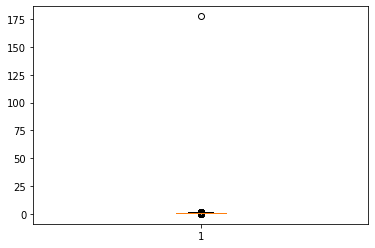

In [381]:
plt.boxplot(aft_array);

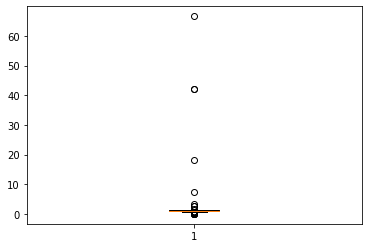

In [382]:
plt.boxplot(ev_array);

In [383]:
# Calculate outliers in rating_decimals in afternoon dataframe (aft_df)
Q1 = aft_df["rating_decimal"].quantile(0.25)
Q3 = aft_df["rating_decimal"].quantile(0.75)
IQR = Q3 - Q1
minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)
aft_df["rating_outlier"] = False

for index, row in aft_df.iterrows():
    if row["rating_decimal"] > maximum:
        aft_df.at[index, "rating_outlier"] =  True

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [384]:
# Delete outliers in afternoon dataframe
aft_df = aft_df.query("rating_outlier == False")

In [385]:
# Calculate outliers in rating_decimals in evening dataframe (ev_df)
Q1 = ev_df["rating_decimal"].quantile(0.25)
Q3 = ev_df["rating_decimal"].quantile(0.75)
IQR = Q3 - Q1
minimum = Q1 - (1.5 * IQR)
maximum = Q3 + (1.5 * IQR)
ev_df["rating_outlier"] = False

for index, row in ev_df.iterrows():
    if row["rating_decimal"] > maximum:
        ev_df.at[index, "rating_outlier"] =  True

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [386]:
# Delete outliers in evening dataframe
ev_df = ev_df.query("rating_outlier == False")

After discarding outliers, we establish our hypotheses:

>$H_{0}$ = Rt_afternoon = Rt_evening

>$H_{1}$ = Rt_afternoon ≠ Rt_evening

In [387]:
# Calculate means for each rating_decimal column (in each dataframe)
aft_df["rating_decimal"].mean(), ev_df["rating_decimal"].mean()

(1.1133401430030643, 1.0719488462607742)

In [388]:
# Convert dataframes with no outliers into array
aft_array_no_out = aft_df["rating_decimal"].to_numpy(dtype=float)
ev_array_no_out = ev_df["rating_decimal"].to_numpy(dtype=float)

In [389]:
# Calculate p-value for the difference between evening and afternoon ratings.
from scipy.stats import ttest_ind

ttest_ind(aft_array_no_out, ev_array_no_out)

Ttest_indResult(statistic=3.7440233641473544, pvalue=0.00018660244508241302)

> According to the p-value in this test, we reject the Null Hypothesis. This means that the ratings posted in the afternoon are significantly higher that those posted in the evening.

#### Question 2: Which breeds have the highest confidence intervals for recognition?

In [390]:
# Discard all images that, according to the data, do not include dogs.
pred_dogs = predictions.query("prediction1_is_dog == True")

In [391]:
# Check average confidence interval for prediction1 (prediction with highest CI)
means_pred = pred_dogs.groupby(["prediction1"], as_index = False)["CI_prediction1"].mean().sort_values("CI_prediction1", ascending=False)

In [392]:
# Mean of all confidence intervals
means_pred["CI_prediction1"].mean()

0.5578105710452034

In [393]:
# Create dataframe only with high confidence predictions (upper 20% of predictions)
high_ci = means_pred.query("CI_prediction1 >= 0.80")

In [394]:
high_ci

,prediction1,CI_prediction1
56,komondor,0.972531
54,keeshond,0.956258
28,clumber,0.946718
21,brittany_spaniel,0.882231
22,bull_mastiff,0.815618
9,bernese_mountain_dog,0.801816


In [395]:
# Check out dataframe only with low confidence predictions (lower 20% of predictions)
means_pred.query("CI_prediction1 <= 0.20")

,prediction1,CI_prediction1
87,scottish_deerhound,0.111893


In [396]:
# To have more fonts available
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

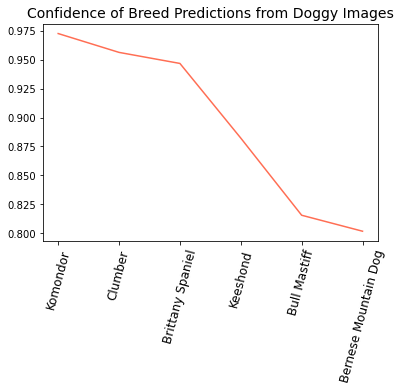

In [398]:
# Creating line plot with high_ci
x = ['Komondor', 'Clumber','Brittany Spaniel', 'Keeshond', 'Bull Mastiff', 'Bernese Mountain Dog']
height = high_ci["CI_prediction1"]

fig = plt.figure()
plt.plot(x, height, color= '#ff6e54')
plt.title("Confidence of Breed Predictions from Doggy Images", fontname='Droid Sans', fontsize=14)
plt.xticks(rotation = 75, fontname='Droid Sans', fontsize=12);

#### Question 3: Are the breeds above also among the most common?

In [399]:
# Count of occurrences of all breeds in prediction1
pred_dogs.groupby("prediction1")["prediction1"].count().sort_values(ascending=False)

prediction1
golden_retriever      143
labrador_retriever     90
pembroke               78
chihuahua              77
pug                    55
                     ... 
scottish_deerhound      1
scotch_terrier          1
japanese_spaniel        1
clumber                 1
silky_terrier           1
Name: prediction1, Length: 109, dtype: int64

In [400]:
# Mean calculation of breed count
(pred_dogs.groupby("prediction1")["prediction1"].count().sort_values(ascending=False)).mean()

12.944954128440367

In [401]:
# Median calculation of breed count
(pred_dogs.groupby("prediction1")["prediction1"].count().sort_values(ascending=False)).median()

7.0

In [402]:
# Create a dataframe with breed occurrences of dogs in the high_ci data set
breeds = ["komondor", "clumber", "brittany_spaniel", "keeshond", "bull_mastiff", "bernese_mountain_dog"]
high_ci_token = pred_dogs[pred_dogs["prediction1"].isin(breeds)]

In [403]:
high_ci_token.shape

(28, 12)

In [404]:
high_ci_count = high_ci_token.groupby("prediction1", as_index=False )["CI_prediction1"].count()

In [405]:
high_ci_count["order"] = [6, 3, 5, 2, 4, 1]

In [406]:
high_ci_count = high_ci_count.sort_values("order")

In [407]:
high_ci_count

,prediction1,CI_prediction1,order
5,komondor,3,1
3,clumber,1,2
1,brittany_spaniel,6,3
4,keeshond,3,4
2,bull_mastiff,5,5
0,bernese_mountain_dog,10,6


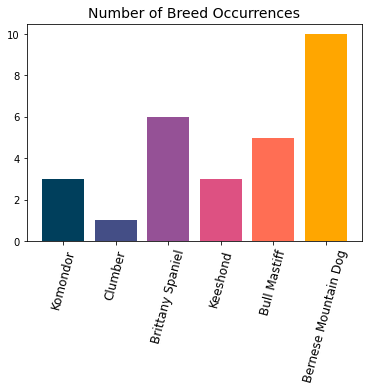

In [408]:
# Creating bar plot with high_ci_count
x1 = high_ci_count["prediction1"]
height1 = high_ci_count["CI_prediction1"]
breeds=['Komondor', 'Clumber','Brittany Spaniel', 'Keeshond', 'Bull Mastiff', 'Bernese Mountain Dog']
colors= ["#003f5c","#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"]

plt.bar(x1, height1, color=colors, tick_label=breeds)
plt.title("Number of Breed Occurrences", fontname='Droid Sans', fontsize=14)
plt.xticks(rotation = 75, fontname='Droid Sans', fontsize=12);